In [14]:
import numpy as np
# from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
# from multiprocessing import Pool
from sklearn.neighbors import KernelDensity

In [4]:
import sys
sys.path.append('..')

from util.participant_stream import ParticipantStream

In [44]:
score_file = np.load("../simulation_results/simulation_scores_2023-12-08_08-16-38.npz")
baseline_scores = {'linear': score_file['baseline_linear'], 'squared': score_file['baseline_squared']}
algo_1_scores = {'linear': score_file['algo1_linear'], 'squared': score_file['algo1_squared']}
algo_2_scores = {'linear': score_file['algo2_linear'], 'squared': score_file['algo2_squared']}
algo_3_scores = {'linear': score_file['algo3_linear'], 'squared': score_file['algo3_squared']}

In [45]:
algo_1_scores['linear']

array([[0.6169248 , 0.67554155, 0.70921585, ..., 0.75364725, 0.75370852,
        0.75429194],
       [0.70727952, 0.74658442, 0.73831156, ..., 0.7610095 , 0.76113298,
        0.76060637],
       [0.63359934, 0.6325174 , 0.67966701, ..., 0.74671521, 0.74623433,
        0.74652626],
       ...,
       [0.6886263 , 0.65538435, 0.67382378, ..., 0.74678298, 0.74726927,
        0.7472071 ],
       [0.60917591, 0.67215978, 0.7115496 , ..., 0.75823248, 0.75814769,
        0.75845688],
       [0.71381189, 0.65955015, 0.68927087, ..., 0.75052276, 0.75003893,
        0.74933188]])

In [46]:
avg_algo_1_scores = {'linear': np.mean(algo_1_scores['linear'], axis=0), 
                     'squared': np.mean(algo_1_scores['squared'], axis=0)}
avg_algo_2_scores = {'linear': np.mean(algo_2_scores['linear'], axis=0), 
                     'squared': np.mean(algo_2_scores['squared'], axis=0)}
avg_algo_3_scores = {'linear': np.mean(algo_3_scores['linear'], axis=0), 
                     'squared': np.mean(algo_3_scores['squared'], axis=0)}
avg_baseline_scores = {'linear': np.mean(baseline_scores['linear'], axis=0), 
                       'squared': np.mean(baseline_scores['squared'], axis=0)}
std_algo_1_scores = {'linear': np.std(algo_1_scores['linear'], axis=0), 
                     'squared': np.std(algo_1_scores['squared'], axis=0)}
std_algo_2_scores = {'linear': np.std(algo_2_scores['linear'], axis=0), 
                     'squared': np.std(algo_2_scores['squared'], axis=0)}
std_algo_3_scores = {'linear': np.std(algo_3_scores['linear'], axis=0), 
                     'squared': np.std(algo_3_scores['squared'], axis=0)}
std_baseline_scores = {'linear': np.std(baseline_scores['linear'], axis=0), 
                       'squared': np.std(baseline_scores['squared'], axis=0)}
ci_algo_1_scores = {'linear': (1.96 * std_algo_1_scores['linear'] / np.sqrt(algo_1_scores['linear'].shape[0])), 
                    'squared': (1.96 * std_algo_1_scores['squared'] / np.sqrt(algo_1_scores['squared'].shape[0]))}
ci_algo_2_scores = {'linear': (1.96 * std_algo_2_scores['linear'] / np.sqrt(algo_2_scores['linear'].shape[0])), 
                    'squared': (1.96 * std_algo_2_scores['squared'] / np.sqrt(algo_2_scores['squared'].shape[0]))}
ci_algo_3_scores = {'linear': (1.96 * std_algo_3_scores['linear'] / np.sqrt(algo_3_scores['linear'].shape[0])), 
                    'squared': (1.96 * std_algo_3_scores['squared'] / np.sqrt(algo_3_scores['squared'].shape[0]))}
ci_baseline_scores = {'linear': (1.96 * std_baseline_scores['linear'] / np.sqrt(baseline_scores['linear'].shape[0])), 
                      'squared': (1.96 * std_baseline_scores['squared'] / np.sqrt(baseline_scores['squared'].shape[0]))}

In [47]:
algo_1_scores['linear'].shape

(100, 100)

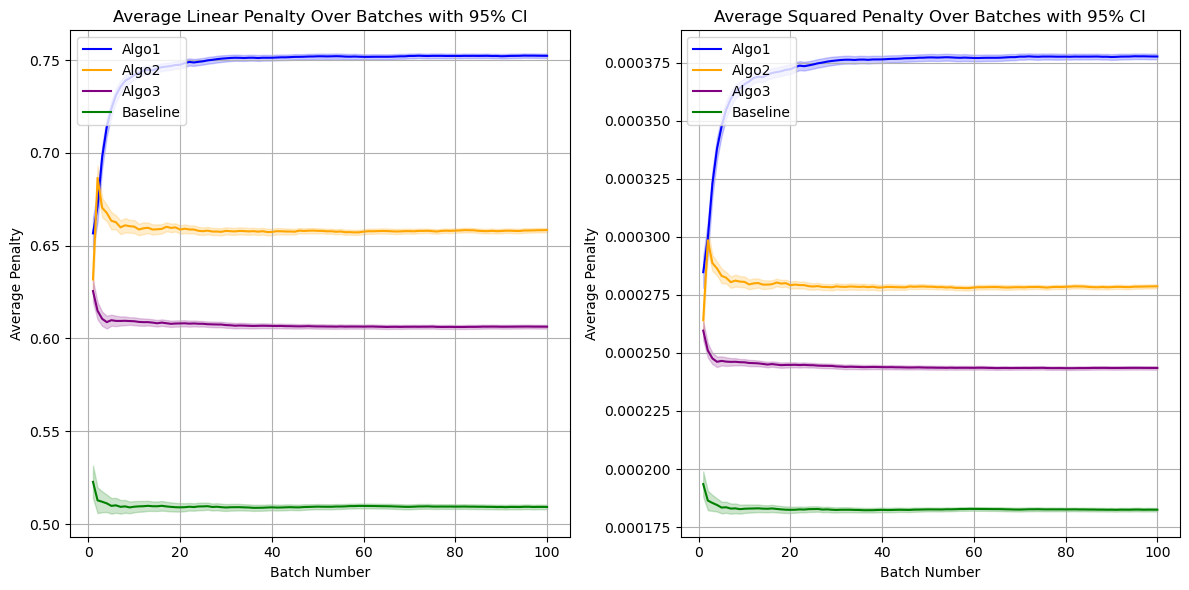

In [48]:
batches = np.arange(1,101)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(batches, avg_algo_1_scores['linear'], label="Algo1", color='blue')
ax[0].fill_between(batches, (avg_algo_1_scores['linear'] - ci_algo_1_scores['linear']), (avg_algo_1_scores['linear'] + ci_algo_1_scores['linear']), color='blue', alpha=0.2)
ax[0].plot(batches, avg_algo_2_scores['linear'], label="Algo2", color='orange')
ax[0].fill_between(batches, (avg_algo_2_scores['linear'] - ci_algo_2_scores['linear']), (avg_algo_2_scores['linear'] + ci_algo_2_scores['linear']), color='orange', alpha=0.2)
ax[0].plot(batches, avg_algo_3_scores['linear'], label="Algo3", color='purple')
ax[0].fill_between(batches, (avg_algo_3_scores['linear'] - ci_algo_3_scores['linear']), (avg_algo_3_scores['linear'] + ci_algo_3_scores['linear']), color='purple', alpha=0.2)
ax[0].plot(batches, avg_baseline_scores['linear'], label="Baseline", color='green')
ax[0].fill_between(batches, (avg_baseline_scores['linear'] - ci_baseline_scores['linear']), (avg_baseline_scores['linear'] + ci_baseline_scores['linear']), color='green', alpha=0.2)
ax[0].set_title('Average Linear Penalty Over Batches with 95% CI')
ax[0].set_xlabel('Batch Number')
ax[0].set_ylabel('Average Penalty')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(batches, avg_algo_1_scores['squared'], label="Algo1", color='blue')
ax[1].fill_between(batches, (avg_algo_1_scores['squared'] - ci_algo_1_scores['squared']), (avg_algo_1_scores['squared'] + ci_algo_1_scores['squared']), color='blue', alpha=0.2)
ax[1].plot(batches, avg_algo_2_scores['squared'], label="Algo2", color='orange')
ax[1].fill_between(batches, (avg_algo_2_scores['squared'] - ci_algo_2_scores['squared']), (avg_algo_2_scores['squared'] + ci_algo_2_scores['squared']), color='orange', alpha=0.2)
ax[1].plot(batches, avg_algo_3_scores['squared'], label="Algo3", color='purple')
ax[1].fill_between(batches, (avg_algo_3_scores['squared'] - ci_algo_3_scores['squared']), (avg_algo_3_scores['squared'] + ci_algo_3_scores['squared']), color='purple', alpha=0.2)
ax[1].plot(batches, avg_baseline_scores['squared'], label="Baseline", color='green')
ax[1].fill_between(batches, (avg_baseline_scores['squared'] - ci_baseline_scores['squared']), (avg_baseline_scores['squared'] + ci_baseline_scores['squared']), color='green', alpha=0.2)
ax[1].set_title('Average Squared Penalty Over Batches with 95% CI')
ax[1].set_xlabel('Batch Number')
ax[1].set_ylabel('Average Penalty')
ax[1].legend()
ax[1].grid(True)

fig.tight_layout()

In [49]:
lin = pd.DataFrame(np.array([avg_baseline_scores['linear'], avg_algo_1_scores['linear'], avg_algo_2_scores['linear'], avg_algo_3_scores['linear']]).T, index=batches, columns=['Baseline', 'Algo 1', 'Algo 2', 'Algo 3'])

In [50]:
sqr = pd.DataFrame(np.array([avg_baseline_scores['squared'], avg_algo_1_scores['squared'], avg_algo_2_scores['squared'], avg_algo_3_scores['squared']]).T, index=batches, columns=['Baseline', 'Algo 1', 'Algo 2', 'Algo 3'])

In [51]:
comb = pd.concat([lin, sqr], axis=1)

In [52]:
comb[80:]

,Baseline,Algo 1,Algo 2,Algo 3,Baseline,Algo 1,Algo 2,Algo 3
81,0.509437,0.752180,0.658193,0.606189,0.000183,0.000378,0.000279,0.000243
82,0.509476,0.752262,0.658382,0.606206,0.000183,0.000378,0.000279,0.000243
83,0.509397,0.752232,0.658328,0.606260,0.000183,0.000378,0.000279,0.000243
84,0.509405,0.752257,0.658292,0.606258,0.000183,0.000378,0.000279,0.000243
85,0.509349,0.752226,0.658023,0.606287,0.000183,0.000378,0.000278,0.000244
86,0.509360,0.752255,0.657869,0.606377,0.000183,0.000378,0.000278,0.000244
87,0.509282,0.752276,0.657816,0.606367,0.000182,0.000378,0.000278,0.000244
88,0.509281,0.752168,0.657986,0.606393,0.000182,0.000378,0.000278,0.000244
89,0.509204,0.752187,0.657793,0.606384,0.000182,0.000378,0.000278,0.000244
90,0.509228,0.752057,0.657893,0.606324,0.000182,0.000378,0.000278,0.000244


In [53]:
comb[:20]

,Baseline,Algo 1,Algo 2,Algo 3,Baseline,Algo 1,Algo 2,Algo 3
1,0.522760,0.656637,0.631786,0.625545,0.000194,0.000285,0.000264,0.000260
2,0.512820,0.671106,0.686534,0.614905,0.000186,0.000299,0.000299,0.000251
3,0.512044,0.697689,0.670442,0.610607,0.000185,0.000323,0.000289,0.000248
4,0.511196,0.713800,0.667659,0.608816,0.000184,0.000338,0.000286,0.000246
5,0.509833,0.723660,0.663433,0.609855,0.000183,0.000348,0.000283,0.000247
6,0.510116,0.730997,0.662643,0.609469,0.000184,0.000355,0.000282,0.000246
7,0.509317,0.735570,0.659879,0.609447,0.000183,0.000359,0.000281,0.000246
8,0.509554,0.738842,0.660957,0.609520,0.000183,0.000363,0.000281,0.000246
9,0.508996,0.740249,0.660486,0.609393,0.000183,0.000364,0.000281,0.000246
10,0.509384,0.741913,0.660264,0.609290,0.000183,0.000366,0.000281,0.000246


In [55]:
ci_baseline_scores['linear']

array([0.00880625, 0.00691053, 0.00562872, 0.00468091, 0.00422344,
       0.00400217, 0.00367447, 0.0034327 , 0.00315227, 0.00301027,
       0.00292932, 0.0028477 , 0.00271835, 0.00255802, 0.00254814,
       0.00260174, 0.00247624, 0.00241335, 0.00234071, 0.00227149,
       0.00216013, 0.00204719, 0.00198567, 0.00202638, 0.00201233,
       0.00192884, 0.00188678, 0.00188812, 0.00188459, 0.00185003,
       0.0018145 , 0.00180903, 0.00174216, 0.00169677, 0.00167904,
       0.00165157, 0.00160955, 0.00161633, 0.00161558, 0.001585  ,
       0.00159261, 0.00154929, 0.00157865, 0.0015104 , 0.00149431,
       0.00151429, 0.00150873, 0.00143021, 0.00139457, 0.00139554,
       0.00138015, 0.00137928, 0.00135998, 0.00135804, 0.00132328,
       0.00130148, 0.00129442, 0.00129171, 0.00128755, 0.00130434,
       0.00130699, 0.00129098, 0.00128266, 0.00127193, 0.00128276,
       0.00131693, 0.00132616, 0.00132921, 0.00132069, 0.00133326,
       0.00130254, 0.00132129, 0.0013045 , 0.00129936, 0.00129